## Setup

In [1]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub #word embedding
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


## Download the IMDB dataset

The IMDB dataset is available on [TensorFlow datasets](https://github.com/tensorflow/datasets). The following code downloads the IMDB dataset to your machine (or the colab runtime):

In [2]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6EN3QP/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6EN3QP/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6EN3QP/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
!pip install Datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [4]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 25000, test entries: 25000


Let's print first 10 examples.

In [5]:
train_examples[:5]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

Let's also print the first 10 labels.

In [6]:
train_labels[:5]

array([0, 0, 0, 1, 1])

In [7]:
from datasets import Dataset
from datasets import Dataset
import pyarrow as pa
import numpy as np
!pip install pandas
import pandas as pd

In [8]:
test_examples_df = pd.DataFrame({"text": test_examples})
test_examples_df

,text
0,"b""There are films that make careers. For Georg..."
1,"b""A blackly comic tale of a down-trodden pries..."
2,"b'Scary Movie 1-4, Epic Movie, Date Movie, Mee..."
3,b'Poor Shirley MacLaine tries hard to lend som...
4,b'As a former Erasmus student I enjoyed this f...
...,...
24995,"b""Feeling Minnesota is not really a road movie..."
24996,"b'This is, without doubt, one of my favourite ..."
24997,"b""Most predicable movie I've ever seen...extre..."
24998,"b""It's exactly what I expected from it. Relaxi..."


In [9]:
train_examples_df = pd.DataFrame({"text": train_examples})
train_examples_df

,text
0,"b""This was an absolutely terrible movie. Don't..."
1,b'I have been known to fall asleep during film...
2,b'Mann photographs the Alberta Rocky Mountains...
3,b'This is the kind of film for a snowy Sunday ...
4,"b'As others have mentioned, all the women that..."
...,...
24995,"b'I have a severe problem with this show, seve..."
24996,"b'The year is 1964. Ernesto ""Che"" Guevara, hav..."
24997,b'Okay. So I just got back. Before I start my ...
24998,b'When I saw this trailer on TV I was surprise...


In [10]:
test_examples_df = pd.DataFrame({"text": test_examples})

In [11]:
test_labels_df = pd.DataFrame({"label": test_labels})
test_labels_df

,label
0,1
1,1
2,0
3,0
4,1
...,...
24995,0
24996,1
24997,0
24998,1


In [12]:
train_labels_df = pd.DataFrame({"label": train_labels})
train_labels_df

,label
0,0
1,0
2,0
3,1
4,1
...,...
24995,0
24996,1
24997,0
24998,0


In [13]:
combined_test_df = pd.concat([test_examples_df, test_labels_df], axis=1)
combined_test_df

,text,label
0,"b""There are films that make careers. For Georg...",1
1,"b""A blackly comic tale of a down-trodden pries...",1
2,"b'Scary Movie 1-4, Epic Movie, Date Movie, Mee...",0
3,b'Poor Shirley MacLaine tries hard to lend som...,0
4,b'As a former Erasmus student I enjoyed this f...,1
...,...,...
24995,"b""Feeling Minnesota is not really a road movie...",0
24996,"b'This is, without doubt, one of my favourite ...",1
24997,"b""Most predicable movie I've ever seen...extre...",0
24998,"b""It's exactly what I expected from it. Relaxi...",1


In [14]:
combined_train_df = pd.concat([train_examples_df, train_labels_df], axis=1)
combined_train_df

,text,label
0,"b""This was an absolutely terrible movie. Don't...",0
1,b'I have been known to fall asleep during film...,0
2,b'Mann photographs the Alberta Rocky Mountains...,0
3,b'This is the kind of film for a snowy Sunday ...,1
4,"b'As others have mentioned, all the women that...",1
...,...,...
24995,"b'I have a severe problem with this show, seve...",0
24996,"b'The year is 1964. Ernesto ""Che"" Guevara, hav...",1
24997,b'Okay. So I just got back. Before I start my ...,0
24998,b'When I saw this trailer on TV I was surprise...,0


In [15]:
from datasets import Dataset
import pyarrow as pa
import numpy as np

In [16]:
train_data=Dataset.from_pandas(combined_train_df)
train_data = train_data.with_format(type='torch', columns=['text', 'label'])
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [17]:
test_data=Dataset.from_pandas(combined_test_df)
test_data = train_data.with_format(type='torch', columns=['text', 'label'])
test_data

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [18]:
print('Training dataset size  ',train_data)
print('Testing dataset size   ',test_data)

Training dataset size   Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})
Testing dataset size    Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


#chaning labels to train dataset

In [19]:
import pandas as pd
from datasets import Dataset
import torch
import torch.nn as nn
import pandas as pd
import functools
import sys
import tensorflow as tf

from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import json
from pandas.core.indexes.api import textwrap
import string
import re
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Dense
from transformers import TFBertModel, BertTokenizer
from sklearn.model_selection import train_test_split
device = torch.device("cuda")

In [20]:
import pandas as pd

In [ ]:
#train_data['label']=train_data['label'].replace(0,'flop') #changing labels
#train_data['label']=test_data['label'].replace(1,'hit')

<Axes: xlabel='label'>

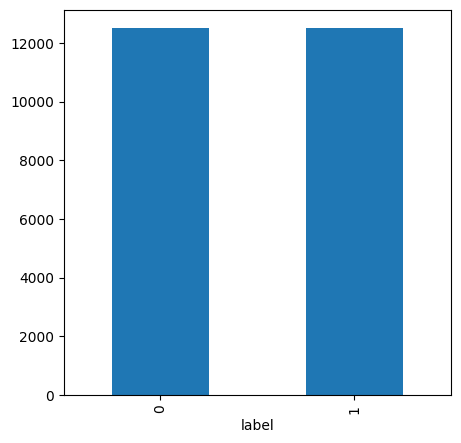

In [21]:
combined_train_df.label.value_counts().plot(kind='bar', figsize=(5,5))

<Axes: xlabel='label'>

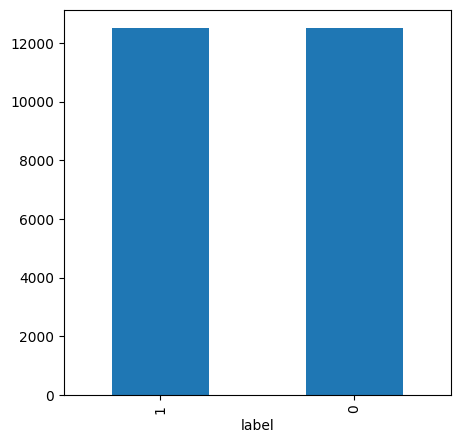

In [22]:
combined_test_df.label.value_counts().plot(kind='bar', figsize=(5,5))

In [23]:
combined_train_df.label.value_counts()


label
0    12500
1    12500
Name: count, dtype: int64

In [24]:
combined_test_df.label.value_counts()


label
1    12500
0    12500
Name: count, dtype: int64

#cleaning dataset

In [25]:
import string
import re
from nltk.corpus import stopwords

def cleaning(text):
    text = text.lower()

    # Remove 'b' if it's at the beginning of the text
    if text.startswith('b'):
        text = text[1:]

    # Removing punctuations
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Removing extra white spaces
    text = ' '.join(text.split())
    # Removing URLs
    text = re.sub(r'http\S+', '', text)
    # Removing special characters
    text = ''.join(char for char in text if char.isprintable())

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stop_words]
    text = ' '.join(cleaned_words)

    return text


In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
combined_train_df

,text,label
0,"b""This was an absolutely terrible movie. Don't...",0
1,b'I have been known to fall asleep during film...,0
2,b'Mann photographs the Alberta Rocky Mountains...,0
3,b'This is the kind of film for a snowy Sunday ...,1
4,"b'As others have mentioned, all the women that...",1
...,...,...
24995,"b'I have a severe problem with this show, seve...",0
24996,"b'The year is 1964. Ernesto ""Che"" Guevara, hav...",1
24997,b'Okay. So I just got back. Before I start my ...,0
24998,b'When I saw this trailer on TV I was surprise...,0


In [34]:
# Importing pandas library
import pandas as pd

# Assuming combined_train_df is your DataFrame containing the 'text' column
combined_train_df['text'] = combined_train_df['text'].astype('str')

# Verify the data type has been changed
print(combined_train_df.dtypes)
combined_train_df

text     object
label     int64
dtype: object


,text,label
0,This was an absolutely terrible movie. Don't b...,0
1,"I have been known to fall asleep during films,...",0
2,Mann photographs the Alberta Rocky Mountains i...,0
3,This is the kind of film for a snowy Sunday af...,1
4,"As others have mentioned, all the women that g...",1
...,...,...
24995,"I have a severe problem with this show, severa...",0
24996,"The year is 1964. Ernesto ""Che"" Guevara, havin...",1
24997,Okay. So I just got back. Before I start my re...,0
24998,When I saw this trailer on TV I was surprised....,0


In [33]:
# Importing pandas library
import pandas as pd

# Assuming combined_train_df is your DataFrame containing the 'text' column
combined_test_df['text'] = combined_test_df['text'].astype('str')

# Verify the data type has been changed
print(combined_test_df.dtypes)


text     object
label     int64
dtype: object


In [29]:
combined_train_df['text']

0        b"This was an absolutely terrible movie. Don't...
1        b'I have been known to fall asleep during film...
2        b'Mann photographs the Alberta Rocky Mountains...
3        b'This is the kind of film for a snowy Sunday ...
4        b'As others have mentioned, all the women that...
                               ...                        
24995    b'I have a severe problem with this show, seve...
24996    b'The year is 1964. Ernesto "Che" Guevara, hav...
24997    b'Okay. So I just got back. Before I start my ...
24998    b'When I saw this trailer on TV I was surprise...
24999    b'First of all, Riget is wonderful. Good comed...
Name: text, Length: 25000, dtype: object

In [31]:
combined_train_df

,text,label
0,"b""This was an absolutely terrible movie. Don't...",0
1,b'I have been known to fall asleep during film...,0
2,b'Mann photographs the Alberta Rocky Mountains...,0
3,b'This is the kind of film for a snowy Sunday ...,1
4,"b'As others have mentioned, all the women that...",1
...,...,...
24995,"b'I have a severe problem with this show, seve...",0
24996,"b'The year is 1964. Ernesto ""Che"" Guevara, hav...",1
24997,b'Okay. So I just got back. Before I start my ...,0
24998,b'When I saw this trailer on TV I was surprise...,0


In [35]:
combined_train_df['text'] = combined_train_df['text'].apply(lambda text: cleaning(text))
combined_test_df['text'] = combined_test_df['text'].apply(lambda text: cleaning(text))

In [36]:
combined_train_df

,text,label
0,absolutely terrible movie dont lured christoph...,0
1,known fall asleep films usually due combinatio...,0
2,mann photographs alberta rocky mountains super...,0
3,kind film snowy sunday afternoon rest world go...,1
4,others mentioned women go nude film mostly abs...,1
...,...,...
24995,severe problem show several actually simple li...,0
24996,year ernesto che guevara cuban citizen last fi...,1
24997,okay got back start review let tell one thing ...,0
24998,saw trailer tv surprised may six flags new jer...,0


#wordcloud

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [38]:
text = ' '.join(combined_train_df['text'].tolist())

In [39]:
wordcloud = WordCloud(width = 1920, height = 1080).generate(text)


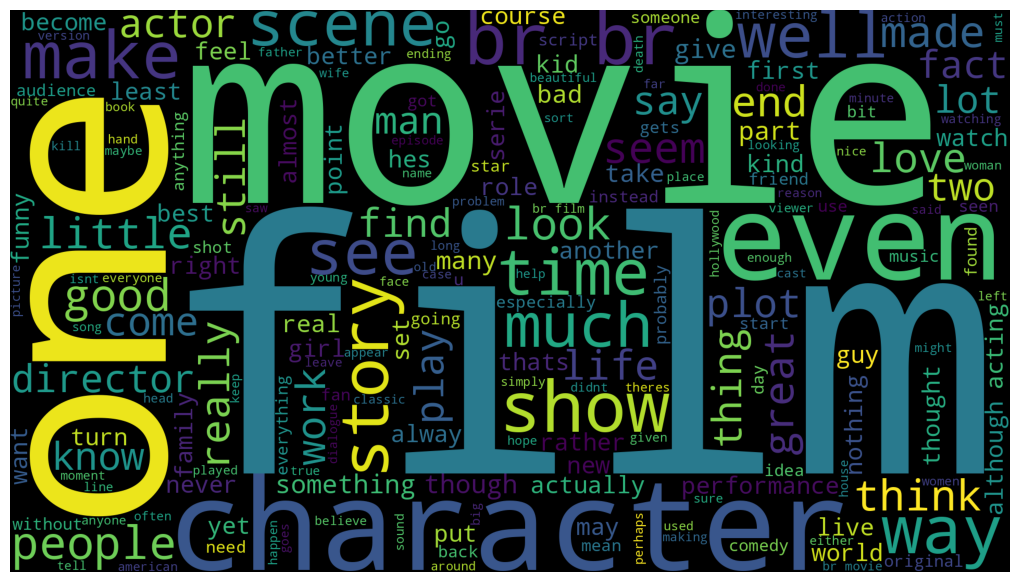

In [40]:
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# More cleaning

In [41]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-d1xe_yb9
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-d1xe_yb9
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=fdd78c32ca726a2d999b57c749c107e19ac582bb64cd71976a55d6bdf5b3a617
  Stored in directory: /tmp/pip-ephem-wheel-cache-pp_rwqel/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [42]:
import preprocess_kgptalkie as ps

In [ ]:
type(combined_train_df['text'])

pandas.core.series.Series

In [43]:
combined_train_df.isna().sum()


text     0
label    0
dtype: int64

In [44]:
combined_test_df.isna().sum()


text     0
label    0
dtype: int64

# stemming stopwords lemmatization

In [45]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [46]:
combined_train_df

,text,label
0,absolutely terrible movie dont lured christoph...,0
1,known fall asleep films usually due combinatio...,0
2,mann photographs alberta rocky mountains super...,0
3,kind film snowy sunday afternoon rest world go...,1
4,others mentioned women go nude film mostly abs...,1
...,...,...
24995,severe problem show several actually simple li...,0
24996,year ernesto che guevara cuban citizen last fi...,1
24997,okay got back start review let tell one thing ...,0
24998,saw trailer tv surprised may six flags new jer...,0


In [47]:
# Tokenize the text by splitting it into individual words
combined_train_df['text'] = combined_train_df['text'].apply(lambda x: x.split())
# Tokenize the text by splitting it into individual words
combined_test_df['text'] = combined_test_df['text'].apply(lambda x: x.split())

In [48]:
combined_train_df

,text,label
0,"[absolutely, terrible, movie, dont, lured, chr...",0
1,"[known, fall, asleep, films, usually, due, com...",0
2,"[mann, photographs, alberta, rocky, mountains,...",0
3,"[kind, film, snowy, sunday, afternoon, rest, w...",1
4,"[others, mentioned, women, go, nude, film, mos...",1
...,...,...
24995,"[severe, problem, show, several, actually, sim...",0
24996,"[year, ernesto, che, guevara, cuban, citizen, ...",1
24997,"[okay, got, back, start, review, let, tell, on...",0
24998,"[saw, trailer, tv, surprised, may, six, flags,...",0


In [49]:
# Remove stopwords from the text
nltk.download('stopwords')
stop_words = stopwords.words('english')
combined_train_df['text'] = combined_train_df['text'].apply(lambda x: [word for word in x if word not in stop_words])
combined_train_df['text'] = combined_test_df['text'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
combined_train_df

,text,label
0,"[films, make, careers, george, romero, night, ...",0
1,"[blackly, comic, tale, downtrodden, priest, na...",0
2,"[scary, movie, epic, movie, date, movie, meet,...",0
3,"[poor, shirley, maclaine, tries, hard, lend, g...",1
4,"[former, erasmus, student, enjoyed, film, much...",1
...,...,...
24995,"[feeling, minnesota, really, road, movie, that...",0
24996,"[without, doubt, one, favourite, horror, films...",1
24997,"[predicable, movie, ive, ever, seenextremely, ...",0
24998,"[exactly, expected, relaxing, humorous, entert...",0


In [51]:
# Lemmatize the words in the text
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
combined_train_df['text'] = combined_train_df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
combined_test_df['text'] = combined_test_df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [52]:
combined_train_df

,text,label
0,"[film, make, career, george, romero, night, li...",0
1,"[blackly, comic, tale, downtrodden, priest, na...",0
2,"[scary, movie, epic, movie, date, movie, meet,...",0
3,"[poor, shirley, maclaine, try, hard, lend, gra...",1
4,"[former, erasmus, student, enjoyed, film, much...",1
...,...,...
24995,"[feeling, minnesota, really, road, movie, that...",0
24996,"[without, doubt, one, favourite, horror, film,...",1
24997,"[predicable, movie, ive, ever, seenextremely, ...",0
24998,"[exactly, expected, relaxing, humorous, entert...",0


In [53]:
# Join the words back into a single string
combined_train_df['text'] = combined_train_df['text'].apply(lambda x: ' '.join(x))
# Join the words back into a single string
combined_test_df['text'] = combined_test_df['text'].apply(lambda x: ' '.join(x))

In [54]:
combined_test_df

,text,label
0,film make career george romero night living de...,1
1,blackly comic tale downtrodden priest nazarin ...,1
2,scary movie epic movie date movie meet spartan...,0
3,poor shirley maclaine try hard lend gravitas m...,0
4,former erasmus student enjoyed film much reali...,1
...,...,...
24995,feeling minnesota really road movie thats stil...,0
24996,without doubt one favourite horror film ever r...,1
24997,predicable movie ive ever seenextremely boring...,0
24998,exactly expected relaxing humorous entertainin...,1


In [55]:
combined_train_df['text'].apply(lambda x: ps.remove_special_chars(x))

0        film make career george romero night living de...
1        blackly comic tale downtrodden priest nazarin ...
2        scary movie epic movie date movie meet spartan...
3        poor shirley maclaine try hard lend gravitas m...
4        former erasmus student enjoyed film much reali...
                               ...                        
24995    feeling minnesota really road movie thats stil...
24996    without doubt one favourite horror film ever r...
24997    predicable movie ive ever seenextremely boring...
24998    exactly expected relaxing humorous entertainin...
24999    dont make cartoon like used one wit great char...
Name: text, Length: 25000, dtype: object

In [56]:
# Save the preprocessed dataset
combined_train_df.to_csv('new_preprocessed_training.csv', index=False)
# Save the preprocessed dataset
combined_test_df.to_csv('new_preprocessed_testing.csv', index=False)

In [57]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [58]:
!pip install transformers

In [59]:
combined_train_df

,text,label
0,film make career george romero night living de...,0
1,blackly comic tale downtrodden priest nazarin ...,0
2,scary movie epic movie date movie meet spartan...,0
3,poor shirley maclaine try hard lend gravitas m...,1
4,former erasmus student enjoyed film much reali...,1
...,...,...
24995,feeling minnesota really road movie thats stil...,0
24996,without doubt one favourite horror film ever r...,1
24997,predicable movie ive ever seenextremely boring...,0
24998,exactly expected relaxing humorous entertainin...,0


In [60]:
x_train = combined_train_df.drop('label', axis= 1)
x_test = combined_test_df.drop('label', axis= 1)
y_train=combined_train_df['label']
y_test=combined_test_df['label']

In [61]:
print(x_train)
print(y_train)

                                                    text
0      film make career george romero night living de...
1      blackly comic tale downtrodden priest nazarin ...
2      scary movie epic movie date movie meet spartan...
3      poor shirley maclaine try hard lend gravitas m...
4      former erasmus student enjoyed film much reali...
...                                                  ...
24995  feeling minnesota really road movie thats stil...
24996  without doubt one favourite horror film ever r...
24997  predicable movie ive ever seenextremely boring...
24998  exactly expected relaxing humorous entertainin...
24999  dont make cartoon like used one wit great char...

[25000 rows x 1 columns]
0        0
1        0
2        0
3        1
4        1
        ..
24995    0
24996    1
24997    0
24998    0
24999    1
Name: label, Length: 25000, dtype: int64


#CNN+LSTM

In [62]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize

In [63]:
import nltk
nltk.download('punkt')
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.layers import Embedding, Conv1D, MaxPooling1D,Attention
from keras.initializers import Constant

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [64]:
from keras.preprocessing.sequence import pad_sequences
stop=set(stopwords.words('english'))

In [65]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus


In [66]:
corpus=create_corpus(combined_train_df)

100%|██████████| 25000/25000 [00:40<00:00, 616.82it/s]


In [67]:
embedding_dict={}
with open('/content/glove.twitter.27B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [68]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)


In [73]:
X_train_new = pad_sequences(tokenizer_obj.texts_to_sequences(combined_train_df['text']), maxlen=MAX_LEN, padding='post')
y_train_new = combined_train_df['label']

X_test_new = pad_sequences(tokenizer_obj.texts_to_sequences(combined_test_df['text']), maxlen=MAX_LEN, padding='post')
y_test_new = combined_test_df['label']

In [70]:
y_train_new[:2]

0    0
1    0
Name: label, dtype: int64

In [71]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 106990


In [80]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

  0%|          | 99/106990 [00:00<00:05, 20447.93it/s]


IndexError: index 100 is out of bounds for axis 0 with size 100

In [78]:
model = Sequential()
model.add(Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix), input_length=MAX_LEN, trainable=False))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(filters=64,kernel_size=5,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(units=1, activation='sigmoid'))

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           10699100  
                                                                 
 conv1d (Conv1D)             (None, 46, 128)           64128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             41024     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 64)                3

In [82]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [83]:
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='accuracy', save_best_only=True)

In [84]:
X_val_new = X_test_new[:2000];
y_val_new = y_test_new[:2000];

In [1]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_new, y_train_new, batch_size=16, epochs=40, validation_data=(X_train_new, y_train_new), verbose=2,callbacks=[early_stopping,model_checkpoint])

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
y_pred = model.predict(X_test_new)
y_pred_classes = np.round(y_pred)
conf_matrix = confusion_matrix(y_test_new, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

782/782 [==============================] - 6s 7ms/step
Confusion Matrix:
[[6243 6257]
 [6283 6217]]


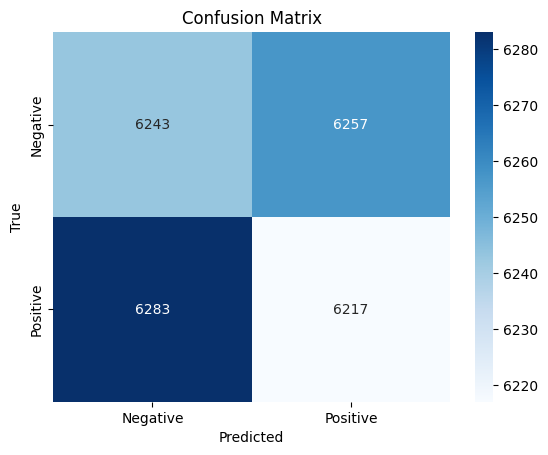

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test_new, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     12500
           1       0.50      0.50      0.50     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_new, y_pred)
average_precision = average_precision_score(y_test_new, y_pred)

In [ ]:
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.show()

Let's first create a Keras layer that uses a TensorFlow Hub model to embed the sentences, and try it out on a couple of input examples. Note that the output shape of the produced embeddings is a expected: `(num_examples, embedding_dimension)`.

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://www.kaggle.com/models/google/nnlm/frameworks/TensorFlow2/variations/en-dim50/versions/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])
embeddings

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

Let's now build the full model:

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

#FCNN Model

## Train the model

Train the model for 40 epochs in mini-batches of 512 samples. This is 40 iterations over all samples in the `x_train` and `y_train` tensors. While training, monitor the model's loss and accuracy on the 10,000 samples from the validation set:

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

In [ ]:
results = model.evaluate(test_examples, test_labels)

print(results)

This fairly naive approach achieves an accuracy of about 87%. With more advanced approaches, the model should get closer to 95%.

## Create a graph of accuracy and loss over time

`model.fit()` returns a `History` object that contains a dictionary with everything that happened during training:

In [ ]:
history_dict = history.history
history_dict.keys()

There are four entries: one for each monitored metric during training and validation. We can use these to plot the training and validation loss for comparison, as well as the training and validation accuracy:

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()